In [3]:
from tst.domutil.util import *
from tst.domutil.test import *

/home/shouldsee/.local/lib/python2.7/site-packages/Bio/SearchIO/__init__.py:211: BiopythonExperimentalWarning: Bio.SearchIO is an experimental submodule which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning)


In [2]:
%%time
# print "finished"
hmms = HMMprofile.objects.defer('text').all().prefetch_related('hits')
hmms = hmms.annotate(hcount = Count('hits')).order_by('id')

hmmids = list(hmms.values_list('id',flat = True))
hcounts = list(hmms.values_list('hcount',flat = True))
sfs = list(hmms.values_list('cath_node__parent',flat = True))

sDB = seqDB.objects.get(name = 'CATH')
sDB.sequence_set.count()
seq = sDB.sequence_set.first()

seqset_all = sDB.sequence_set.all().prefetch_related('hmmprofile_set')

# seq.HMMprofile
# seq.hmmprofile
# dir(seq)
seq.hmmprofile_set.count()

# hcounts_pad = hcounts_
hmmids_pad = hmmids[:]
hmmids_pad.insert(0, None)

hcounts_pad = hcounts[:]
hcounts_pad.insert(0,None)

sfs_pad = sfs[:]
sfs_pad.insert(0,None)


CPU times: user 192 ms, sys: 20 ms, total: 212 ms
Wall time: 47.1 s


In [4]:
%%time
#### Cache the raw ISS matrix

import cPickle as pk

fname = 'data/ISS_raw'

# test__raw(D_raw,hmms)
# pk.dump(D_raw.tocoo(),open(  fname ,'wb'))

if 'D_raw' not in locals().keys():
    D_raw = pk.load(open(fname, 'rb'))

test__raw(D_raw,hmms)



[OK] HMM for 2.60.40.10.648.0  against HMM for 2.60.40.10.369.0  overlaps 255, with 255 from 
0 of -1
[OK] HMM for 3.40.50.1820.108.0  against HMM for 3.40.50.1820.70.0  overlaps 761, with 761 from 
[OK] HMM for 3.40.50.300.171.0  against HMM for 3.40.50.2300.51.0  overlaps 10, with 10 from 
[OK] HMM for 2.60.40.10.290.0  against HMM for 2.10.70.10.35.0  overlaps 2, with 2 from 
[OK] HMM for 2.130.10.10.46.0  against HMM for 2.120.10.10.8.0  overlaps 86, with 86 from 
CPU times: user 352 ms, sys: 12 ms, total: 364 ms
Wall time: 482 ms


In [ ]:
%%time
# norm_count = dict()
OUTPUT = dict()
c=counter(range(6577065),per=100000)
for (x,y),v in counts.iteritems():
    c.count()
    h1 = hcounts[x-1]
    h2 = hcounts[y-1]
    h3 = v
    OUTPUT[(x,y)] = ISS_normalise(h1,h2,h3)
norm_count = OUTPUT
# for x,y,v in using_tocoo_izip(D_raw):

D_norm = copy(D_raw.todok())
D_norm.update(norm_count)

In [8]:
%%time
import cPickle as pk

fname = 'data/ISS_norm'

# test__norm(D_norm, hmms)
# pk.dump(D_norm.tocoo(),open(  fname ,'wb'))

if 'D_norm' not in locals().keys():
    D_norm = pk.load(open(fname, 'rb'))        
test__norm(D_norm,hmms)

[OK] HMM for 2.60.40.10.648.0  against HMM for 2.60.40.10.369.0  overlaps:: Expected:0.0400010969086, Actual:0.0400010969086
0 of -1
[OK] HMM for 3.40.50.1820.108.0  against HMM for 3.40.50.1820.70.0  overlaps:: Expected:0.0136699368704, Actual:0.0136699368704
[OK] HMM for 3.40.50.300.171.0  against HMM for 3.40.50.2300.51.0  overlaps:: Expected:1.80489022196, Actual:1.80489022196
[OK] HMM for 2.60.40.10.290.0  against HMM for 2.10.70.10.35.0  overlaps:: Expected:2.28950668734, Actual:2.28950668734
[OK] HMM for 2.130.10.10.46.0  against HMM for 2.120.10.10.8.0  overlaps:: Expected:0.199434269905, Actual:0.199434269905
CPU times: user 15.3 s, sys: 488 ms, total: 15.8 s
Wall time: 15.9 s


In [11]:
# len(hcounts_pad)


21088

In [12]:
%%time
##################################################################
##################################################################
############### Append information to pairwise hits   ############
################Short version ####################################
##################################################################

# using_coo_izip
# D_curr = D_raw
D_curr = D_norm

xdata = []
ydata = []
vdata = []
sfbools = []

for x,y,v in using_tocoo_izip(D_curr):
    xdata.append( hcounts_pad[x])
    ydata.append( hcounts_pad[y])
    vdata.append( v )
    sfbools.append(sfs_pad[x]==sfs_pad[y])

CPU times: user 8.26 s, sys: 148 ms, total: 8.4 s
Wall time: 8.38 s


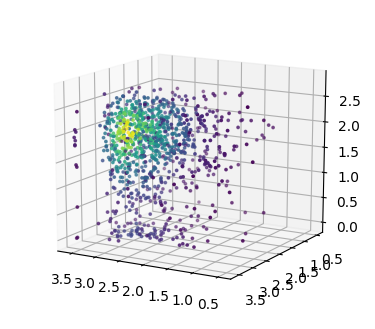

In [13]:
from scipy import stats


import matplotlib
%matplotlib inline
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

kwargs = {
    'projection':'3d',
}
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
# idx = range(1000)


N = 1000

xss = np.array(xdata)
yss = np.array(ydata)
zss = np.array(vdata)

# xss = np.array(xss)
# yss = np.array(yss) 
# zss = np.array(zss)

# idx = sfbools
# xss = np.delete(xss,idx)
# yss = np.delete(yss,idx)
# zss = np.delete(zss,idx)

idx = np.random.choice(range(len(xss)), N, replace = False)
xss= np.array(xss)
yss = np.array(yss)
zss = np.array(zss)


xss = xss[idx]
yss = yss[idx]
zss = zss[idx]
# xss= np.array(xss[:N])
# yss = np.array(yss[:N])
# zss = np.array(zss[:N])

xss = np.log10(xss + 1)
yss = np.log10(yss + 1)
# zss = np.log10(zss+1)

xyz = np.vstack([xss,yss,zss])
kde = stats.gaussian_kde(xyz)
# ax1.set_zlim([0,2000])

ax1.scatter(xss,yss,zss,'.',3, c = kde([xss,yss,zss]))

X = np.linspace(xss.min(), xss.max(),30)
Y = np.linspace(yss.min(), yss.max(),30)
# Z = np.linspace(zss.min(), zss.max(),30)
# Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X + Y) / 2 - 2

ax1.view_init(elev=15., azim=120)
# surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha = 0.5, 
#                        linewidth=0, antialiased=False)

In [14]:
import cPickle as pk
pdata = np.vstack([xss,yss,zss])
fname = 'data/%dpdata'%N
pk.dump(pdata, open(fname, 'wb'))
